In [6]:
from scipy.io import loadmat
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from scipy.signal import savgol_filter
from scipy.ndimage.filters import gaussian_filter1d


%matplotlib inline

In [7]:
filelist = ["calcium_data/140708B_140811a_result", 
            "calcium_data/140909C_141112a_result", 
            "calcium_data/141006C_141121a_result",
            "calcium_data/150109A_150302a_result", 
            "calcium_data/151122A_160202a_result", 
            "calcium_data/151122B_160207a_result", 
            "calcium_data/160209A_160430a_result", 
            "calcium_data/160209B_160428a_result"]

In [8]:
def smoothen(filename):
    f = h5py.File(filename+".hdf5", "r")
    data = f['data']
    return savgol_filter(data, 41, 2, deriv=0, axis=2)

def smoothen_g(filename):
    f = h5py.File(filename+".hdf5", "r")
    data = f['data']
    return gaussian_filter1d(data, sigma=5, axis=2)

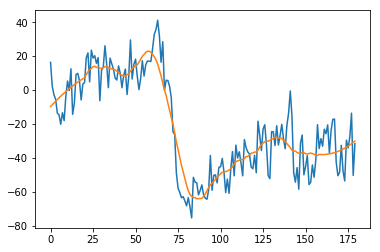

In [44]:
plt.plot(h5py.File(filelist[0]+'.hdf5', 'r')['data'][0,0,:])
plt.plot(smoothen(filelist[0])[0,0,:])

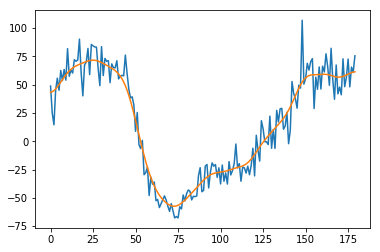

In [58]:
plt.plot(h5py.File(filelist[0]+'.hdf5', 'r')['data'][1,1,:])
plt.plot(smoothen_g(filelist[0])[1,1,:])

In [9]:
smoothen_g(filelist[0]).shape

(350, 115, 180)